In [102]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data.Survived.value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
data.Sex.value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

In [12]:
data['Survived'].skew()

0.4785234382949897

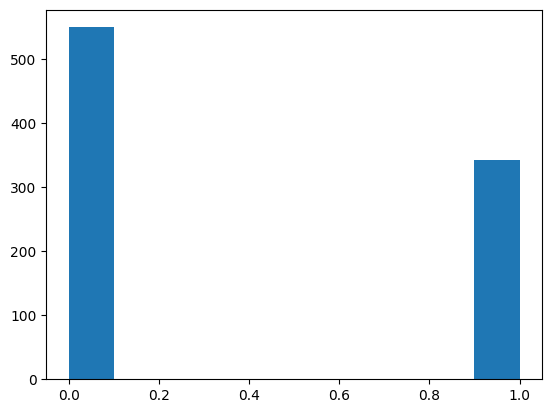

In [13]:
plt.hist(data['Survived'])
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
data.isnull().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [20]:
data.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [21]:
data.drop(columns=['Cabin'], axis=1, inplace=True)

In [22]:
data.shape

(891, 11)

In [23]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [24]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<Axes: >

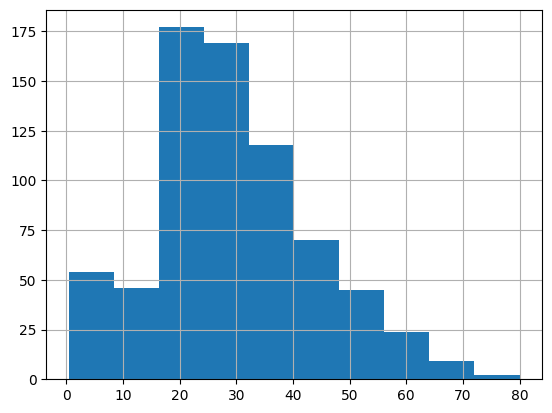

In [25]:
data['Age'].hist()

In [26]:
data['Age'].skew()

0.38910778230082704

In [27]:
data['Age'].mean()

29.69911764705882

In [29]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [30]:
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [31]:
data.dropna(inplace=True)

In [32]:
data.shape


(889, 11)

<Axes: >

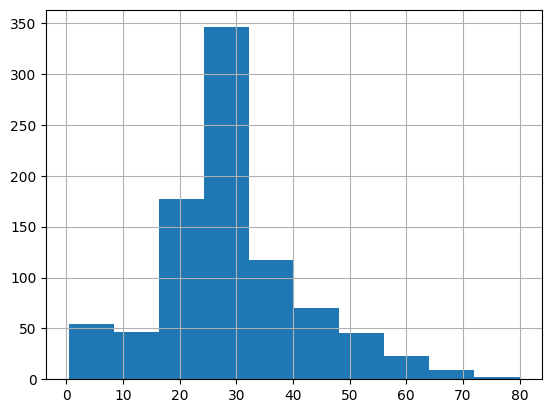

In [33]:
data['Age'].hist()

In [36]:
data['Age'].skew()

0.43172026491227716

In [38]:
data.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [39]:
data.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [52]:
data.Survived.unique()


array([0, 1], dtype=int64)

In [40]:
data.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [41]:
data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [42]:
def attribute_info(df_feature):
 
 print('Description of Feature: ', '\n')
 print(df_feature.describe(), '\n')
 
 print('Value Counts of Feature: ', '\n')
 print(df_feature.value_counts(), '\n')
 
 print('Unique Values of Feature: ', '\n')
 print(df_feature.unique(), '\n')
 
 print('Missing Values of Feature: ', '\n')
 print(df_feature.isnull().sum(), '\n')
 
 print('Missing Values of Feature in %: ', '\n')
 print(df_feature.isnull().sum()/len(df_feature)*100, '\n')


In [ ]:
for col in data:
    print('\033[1m'+'Attribute Name:', col + '\033[0m')
    print()
    attribute_info(data[col])
    print('----------------------------------------------------------------')
    print()

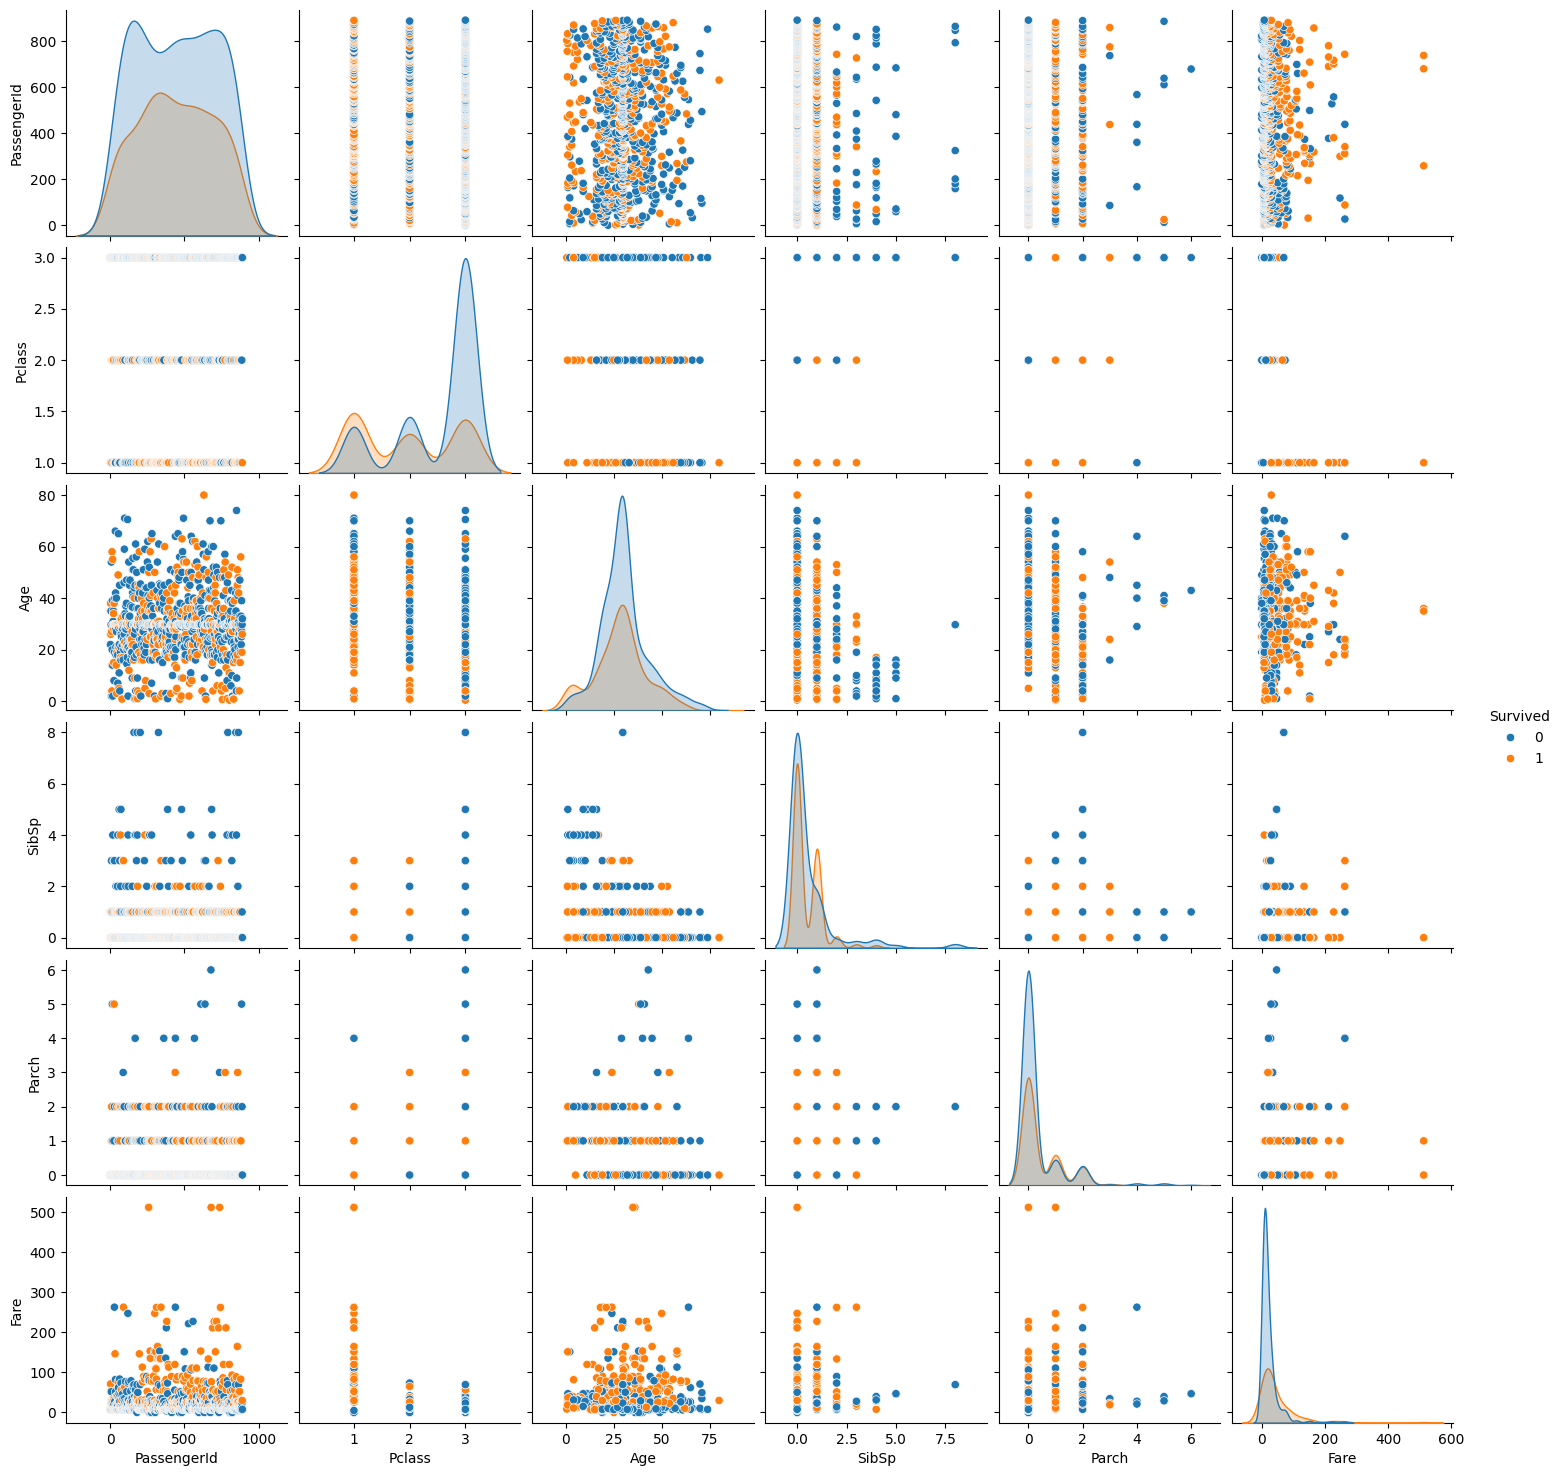

In [51]:
sns.pairplot(data, hue='Survived')

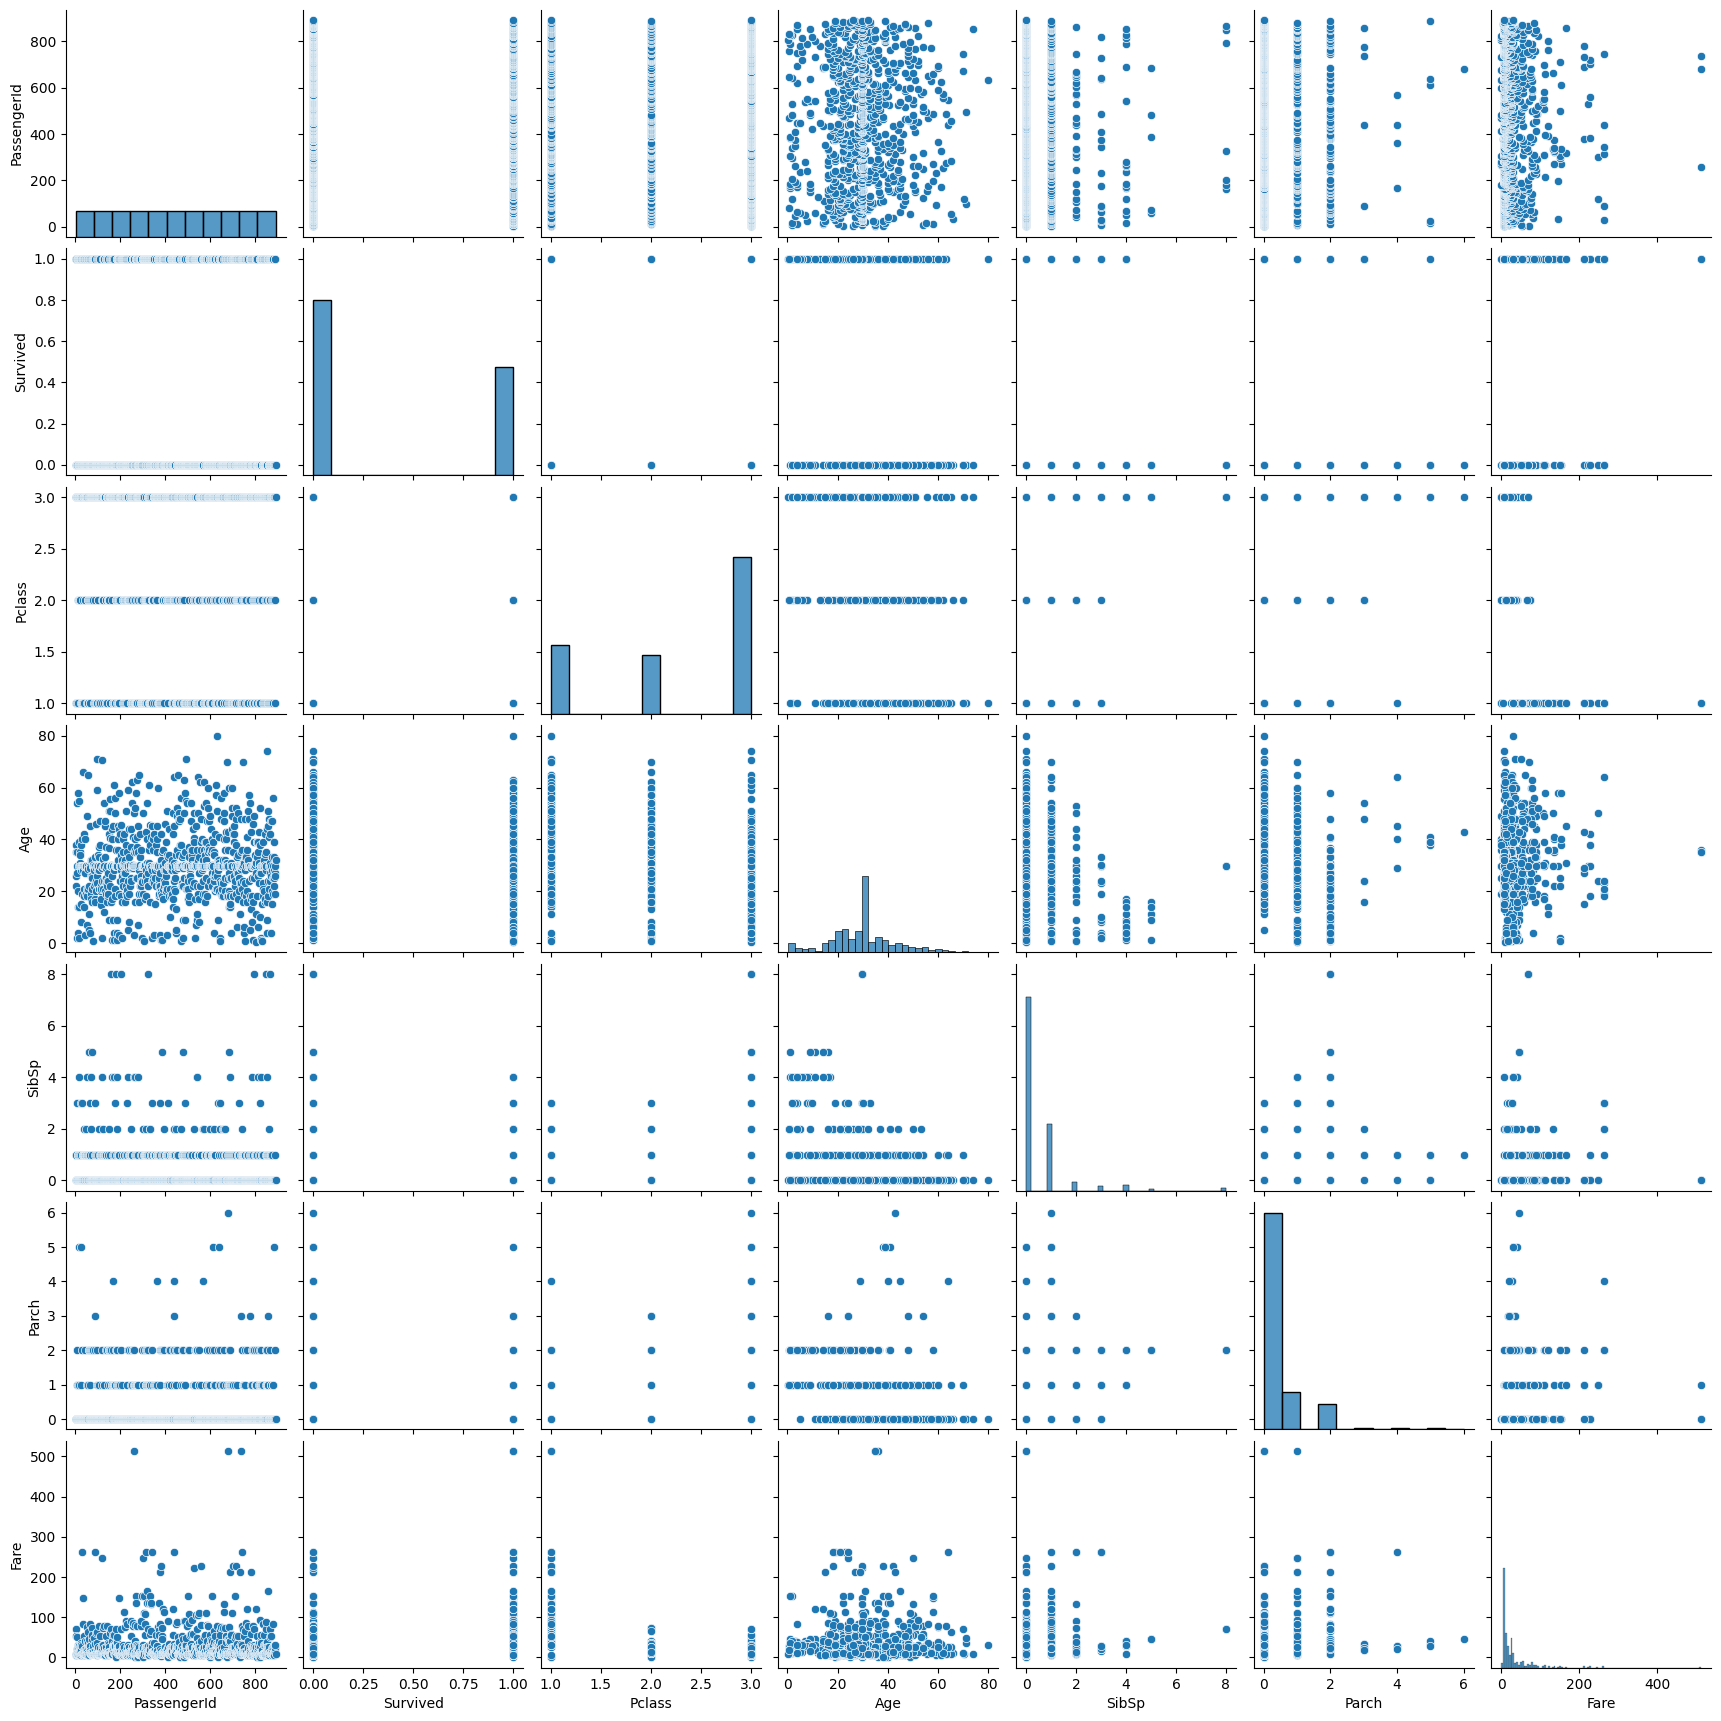

In [54]:
sns.pairplot(data)

<Axes: >

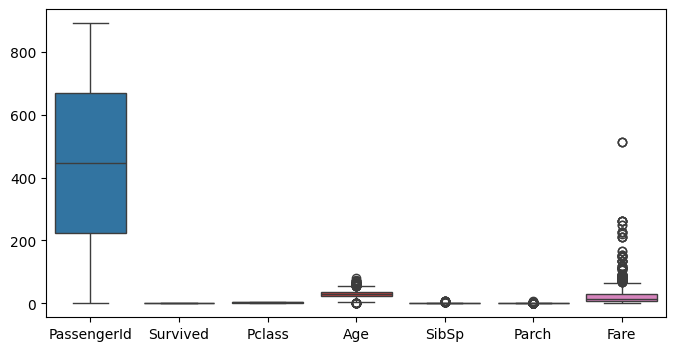

In [55]:
plt.figure(figsize=(8,4))
sns.boxplot(data)

<Axes: ylabel='Age'>

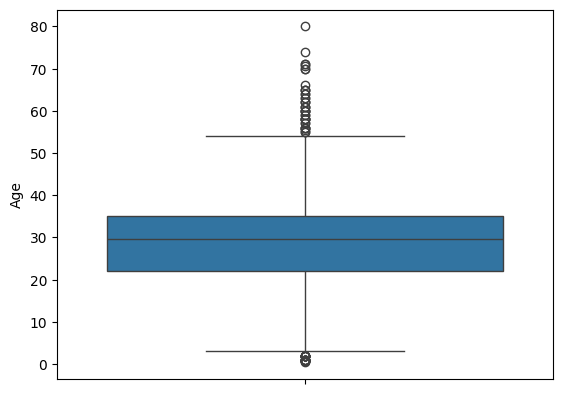

In [56]:
sns.boxplot(data["Age"])

<Axes: ylabel='Fare'>

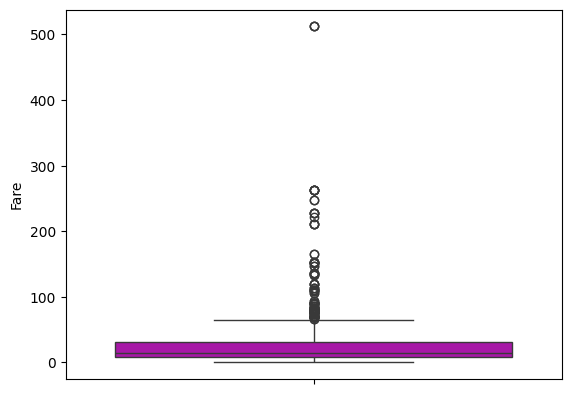

In [57]:
sns.boxplot(data['Fare'],color='m')

In [58]:
data[data['Fare']>400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [60]:
data[(data['Fare']<=300) & (data['Fare']>200)][['Name','Fare','Survived']]

,Name,Fare,Survived
27,"Fortune, Mr. Charles Alexander",263.0000,0
88,"Fortune, Miss. Mabel Helen",263.0000,1
118,"Baxter, Mr. Quigg Edmond",247.5208,0
299,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",247.5208,1
311,"Ryerson, Miss. Emily Borie",262.3750,1
341,"Fortune, Miss. Alice Elizabeth",263.0000,1
377,"Widener, Mr. Harry Elkins",211.5000,0
380,"Bidois, Miss. Rosalie",227.5250,1
438,"Fortune, Mr. Mark",263.0000,0
527,"Farthing, Mr. John",221.7792,0


In [61]:
len(data[(data['Fare']<=300) & (data['Fare']>200)][['Name','Fare','Survived']])

17

In [62]:
data[(data['Fare']>90)][['Name','Fare','Survived']]

,Name,Fare,Survived
27,"Fortune, Mr. Charles Alexander",263.0000,0
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",146.5208,1
88,"Fortune, Miss. Mabel Helen",263.0000,1
118,"Baxter, Mr. Quigg Edmond",247.5208,0
195,"Lurette, Miss. Elise",146.5208,1
215,"Newell, Miss. Madeleine",113.2750,1
258,"Ward, Miss. Anna",512.3292,1
268,"Graham, Mrs. William Thompson (Edith Junkins)",153.4625,1
269,"Bissette, Miss. Amelia",135.6333,1
291,"Bishop, Mrs. Dickinson H (Helen Walton)",91.0792,1


In [63]:
len(data[(data['Fare']>90)][['Name','Fare','Survived']])

57

In [64]:
data[(data['Fare'] > 90)][['Name','Fare','Survived']].index

Index([ 27,  31,  88, 118, 195, 215, 258, 268, 269, 291, 297, 299, 305, 306,
       307, 311, 318, 319, 325, 332, 334, 337, 341, 373, 377, 380, 390, 393,
       435, 438, 484, 498, 505, 520, 527, 537, 544, 550, 557, 581, 609, 659,
       660, 679, 689, 698, 700, 708, 716, 730, 737, 742, 763, 779, 802, 820,
       856],
      dtype='int64')

In [65]:
data.drop(index=[ 27,  31,  88, 118, 195, 215, 258, 268, 269, 291, 297, 299, 305, 306,
       307, 311, 318, 319, 325, 332, 334, 337, 341, 373, 377, 380, 390, 393,
       435, 438, 484, 498, 505, 520, 527, 537, 544, 550, 557, 581, 609, 659,
       660, 679, 689, 698, 700, 708, 716, 730, 737, 742, 763, 779, 802, 820,
       856], axis=0, inplace=True)

In [67]:
data.shape

(832, 11)

<Axes: ylabel='Fare'>

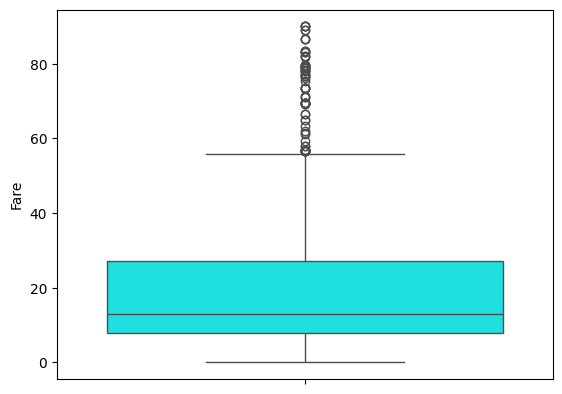

In [72]:
sns.boxplot(data['Fare'],color='aqua')

In [73]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [74]:
data['Gender']=data['Sex'].map({'male':0,'female':1})

In [75]:
data.drop(columns=['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [76]:
data.shape

(832, 8)

In [77]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.000000,1,0,7.2500,0
1,2,1,1,38.000000,1,0,71.2833,1
2,3,1,3,26.000000,0,0,7.9250,1
3,4,1,1,35.000000,1,0,53.1000,1
4,5,0,3,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0
887,888,1,1,19.000000,0,0,30.0000,1
888,889,0,3,29.699118,1,2,23.4500,1
889,890,1,1,26.000000,0,0,30.0000,0


In [78]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
PassengerId,1.000000,-0.014071,-0.031693,0.022494,-0.053407,-0.003555,-0.007587,-0.044108
Survived,-0.014071,1.000000,-0.291199,-0.088257,-0.044310,0.075885,0.256874,0.521746
Pclass,-0.031693,-0.291199,1.000000,-0.354043,0.106745,0.091059,-0.634607,-0.069561
Age,0.022494,-0.088257,-0.354043,1.000000,-0.233706,-0.197070,0.139727,-0.103911
SibSp,-0.053407,-0.044310,0.106745,-0.233706,1.000000,0.419031,0.355650,0.117556
Parch,-0.003555,0.075885,0.091059,-0.197070,0.419031,1.000000,0.239596,0.265015
Fare,-0.007587,0.256874,-0.634607,0.139727,0.355650,0.239596,1.000000,0.178660
Gender,-0.044108,0.521746,-0.069561,-0.103911,0.117556,0.265015,0.178660,1.000000


<Axes: >

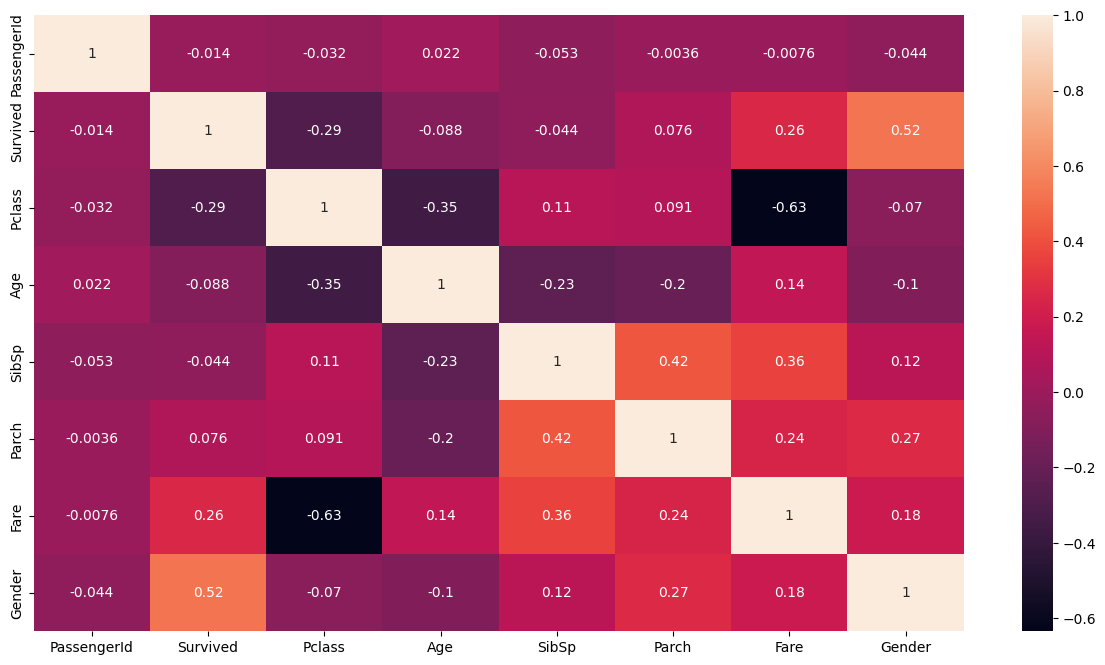

In [79]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)

In [81]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Gender'],
      dtype='object')

In [83]:
X=data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Gender']]
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,3,22.000000,1,0,7.2500,0
1,2,1,38.000000,1,0,71.2833,1
2,3,3,26.000000,0,0,7.9250,1
3,4,1,35.000000,1,0,53.1000,1
4,5,3,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,0
887,888,1,19.000000,0,0,30.0000,1
888,889,3,29.699118,1,2,23.4500,1
889,890,1,26.000000,0,0,30.0000,0


In [84]:
y=data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 832, dtype: int64

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [86]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
511,512,3,29.699118,0,0,8.0500,0
370,371,1,25.000000,1,0,55.4417,0
494,495,3,21.000000,0,0,8.0500,0
721,722,3,17.000000,1,0,7.0542,0
321,322,3,27.000000,0,0,7.8958,0
...,...,...,...,...,...,...,...
74,75,3,32.000000,0,0,56.4958,0
110,111,1,47.000000,0,0,52.0000,0
280,281,3,65.000000,0,0,7.7500,0
466,467,2,29.699118,0,0,0.0000,0


In [87]:
X_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
652,653,3,21.000000,0,0,8.4333,0
878,879,3,29.699118,0,0,7.8958,0
303,304,2,29.699118,0,0,12.3500,1
600,601,2,24.000000,2,1,27.0000,1
173,174,3,21.000000,0,0,7.9250,0
...,...,...,...,...,...,...,...
198,199,3,29.699118,0,0,7.7500,1
697,698,3,29.699118,0,0,7.7333,1
488,489,3,30.000000,0,0,8.0500,0
832,833,3,29.699118,0,0,7.2292,0


In [88]:
y_train

511    0
370    1
494    0
721    0
321    0
      ..
74     1
110    0
280    0
466    0
106    1
Name: Survived, Length: 665, dtype: int64

In [89]:
y_test

652    0
878    0
303    1
600    1
173    0
      ..
198    1
697    1
488    0
832    0
571    1
Name: Survived, Length: 167, dtype: int64

In [90]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [91]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [110]:
#to improve accuracy 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=4)
rf.fit(X_train, y_train)
#for better accuracy
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [92]:
y_train

511    0
370    1
494    0
721    0
321    0
      ..
74     1
110    0
280    0
466    0
106    1
Name: Survived, Length: 665, dtype: int64

In [93]:
y_pred_train

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,

In [95]:
y_test

652    0
878    0
303    1
600    1
173    0
      ..
198    1
697    1
488    0
832    0
571    1
Name: Survived, Length: 167, dtype: int64

In [94]:
y_pred_test

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [111]:
confusion_matrix(y_train, y_pred_train)

array([[405,  19],
       [ 78, 163]], dtype=int64)

In [112]:
accuracy_score(y_train, y_pred_train)

0.8541353383458646

In [113]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       424
           1       0.90      0.68      0.77       241

    accuracy                           0.85       665
   macro avg       0.87      0.82      0.83       665
weighted avg       0.86      0.85      0.85       665



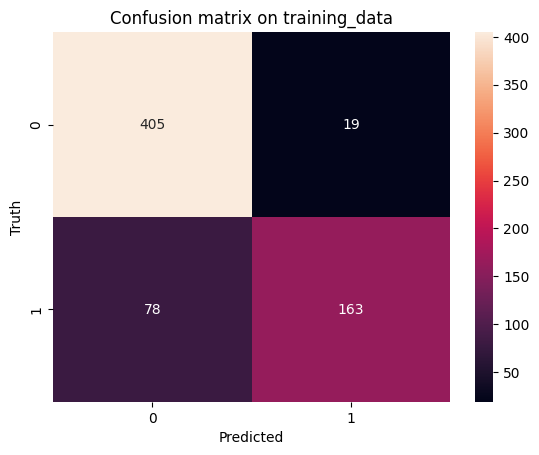

----------------------------
TP: 163
TN: 405
FP: 19
FN: 78


accuracy: 0.8541353383458646
F1-score: 0.7706855791962175
Precision: 0.8956043956043956
Recall: 0.6763485477178424


In [114]:
sns.heatmap(confusion_matrix(y_train,y_pred_train), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")
tn, fp, fn, tp = confusion_matrix(y_train,y_pred_train).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print('\n')
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('F1-score: {}'.format(f1_score(y_train, y_pred_train)))
print('Precision: {}'.format(precision_score(y_train,y_pred_train)))
print('Recall: {}'.format(recall_score(y_train,y_pred_train)))

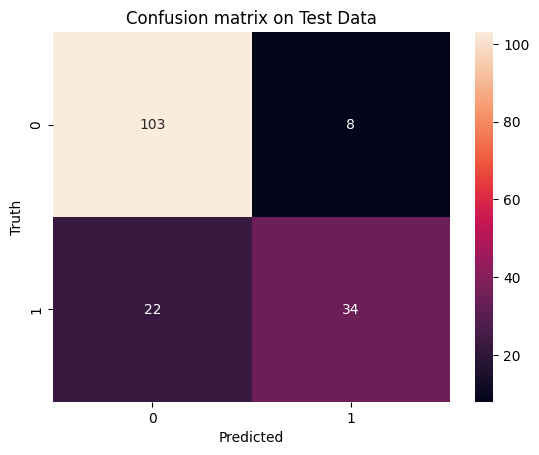

----------------------------
TP: 34
TN: 103
FP: 8
FN: 22


accuracy: 0.8203592814371258
F1-score: 0.6938775510204083
Precision: 0.8095238095238095
Recall: 0.6071428571428571


In [115]:
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt='d')
plt.title('Confusion matrix on Test Data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_test).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print('\n')
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('F1-score: {}'.format(f1_score(y_test,y_pred_test)))
print('Precision: {}'.format(precision_score(y_test,y_pred_test)))
print('Recall: {}'.format(recall_score(y_test,y_pred_test)))


In [103]:
parameters = {
 
 'penalty': ['l1', 'l2', 'elasticnet'],
 'solver': ['lbfgs', 'newton-cg', 'liblinear'],
 'C' : [1.0, 0.1, 0.01, 0.001],
 'max_iter': [100, 200, 500, 1000]
 
}
parameters

{'penalty': ['l1', 'l2', 'elasticnet'],
 'solver': ['lbfgs', 'newton-cg', 'liblinear'],
 'C': [1.0, 0.1, 0.01, 0.001],
 'max_iter': [100, 200, 500, 1000]}

In [104]:
classifier = LogisticRegression()
grid_search = GridSearchCV(classifier, param_grid=parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01, 0.001],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear']})

In [105]:
grid_search.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [106]:
grid_search.best_score_

0.7849624060150376

In [107]:
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Best Accuracy Score: {grid_search.best_score_}')
print('\n')
# Training Evaluation
best_classifier = grid_search.best_estimator_
y_pred_train = best_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f'Training Accuracy: {accuracy}')
# Test Evaluation
best_classifier = grid_search.best_estimator_
y_pred_test = best_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {accuracy}')

Best Hyperparameters: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Accuracy Score: 0.7849624060150376


Training Accuracy: 0.7849624060150376
Test Accuracy: 0.8143712574850299


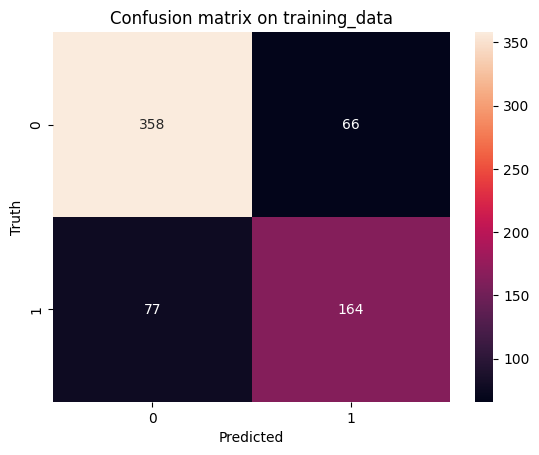

----------------------------
TP: 164
TN: 358
FP: 66
FN: 77


accuracy: 0.7849624060150376
F1-score: 0.6963906581740976
Precision: 0.7130434782608696
Recall: 0.6804979253112033


In [108]:
sns.heatmap(confusion_matrix(y_train,y_pred_train), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")
tn, fp, fn, tp = confusion_matrix(y_train,y_pred_train).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print('\n')
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('F1-score: {}'.format(f1_score(y_train, y_pred_train)))
print('Precision: {}'.format(precision_score(y_train,y_pred_train)))
print('Recall: {}'.format(recall_score(y_train,y_pred_train)))

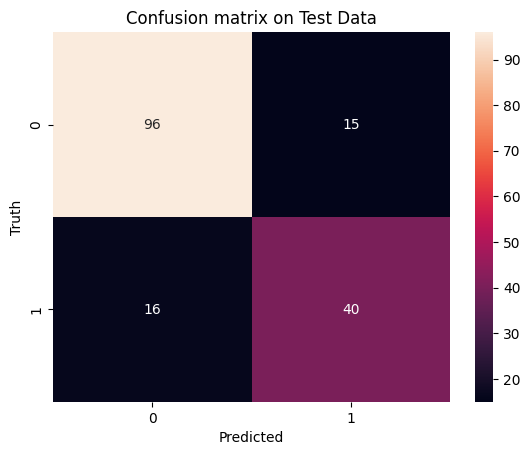

----------------------------
TP: 40
TN: 96
FP: 15
FN: 16


accuracy: 0.8143712574850299
F1-score: 0.7207207207207208
Precision: 0.7272727272727273
Recall: 0.7142857142857143


In [109]:
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt='d')
plt.title('Confusion matrix on Test Data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_test).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print('\n')
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('F1-score: {}'.format(f1_score(y_test,y_pred_test)))
print('Precision: {}'.format(precision_score(y_test,y_pred_test)))
print('Recall: {}'.format(recall_score(y_test,y_pred_test)))